1. data로드
2. 로드한 data를 분석하여 적용할 모델 결정
* 피처의 갯수는 자유 모델 학습

In [1]:
import pandas as pd
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data1.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,Y
0,0,-0.863356,0.099329,0.504212,-1.012457,-1.035606,-0.932570,1.250570,-0.180155,-0.234538,-1.426938,2
1,1,0.241204,0.746163,1.023117,0.558082,1.127784,0.926558,-1.116950,0.514648,-0.035297,2.540232,1
2,2,-1.540558,0.145486,0.489066,1.060715,0.314026,-0.019323,-0.860129,-0.095322,-1.989269,-1.805936,2
3,3,1.049093,2.045749,0.932710,-0.719941,3.170975,-0.854161,-0.893574,2.676143,-0.156024,0.033090,0
4,4,-0.335581,0.170702,0.651474,-0.047278,1.896182,0.122531,0.664144,-0.164305,-0.784687,-0.200908,2
...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,0.764497,-0.435627,-1.145271,-1.272558,-0.268373,-1.481246,1.518759,0.069784,-1.171160,0.146441,0
296,296,2.188619,-0.569263,1.328946,-0.018767,-0.219773,1.144554,1.283455,-1.818009,0.597946,-1.143641,2
297,297,0.084968,1.390983,1.349395,0.850531,-1.606440,0.079122,-0.839124,1.336351,-1.011774,-0.045113,1
298,298,0.327066,0.014514,-0.501013,0.936129,1.631597,1.426159,0.678380,0.361989,0.832651,-0.455825,0


In [3]:
data.Y

0      2
1      1
2      2
3      0
4      2
      ..
295    0
296    2
297    1
298    0
299    2
Name: Y, Length: 300, dtype: int64

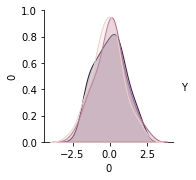

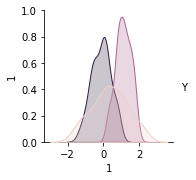

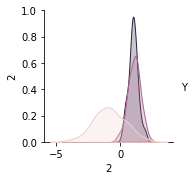

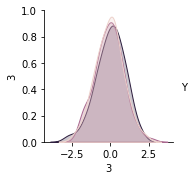

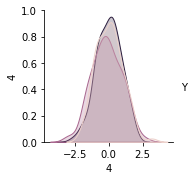

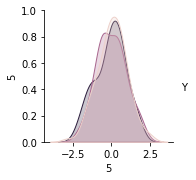

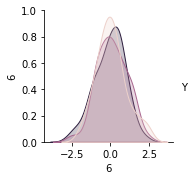

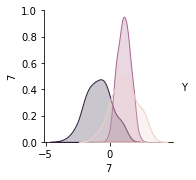

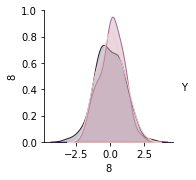

In [4]:
for i in range(9):
    a = str(i)
    sns.pairplot(vars = [a], data=data, hue = 'Y')

In [5]:
X_data = data[['1','7']].values
X_data

array([[ 9.93289093e-02, -1.80155313e-01],
       [ 7.46163297e-01,  5.14647811e-01],
       [ 1.45485833e-01, -9.53219757e-02],
       [ 2.04574869e+00,  2.67614317e+00],
       [ 1.70701805e-01, -1.64305459e-01],
       [ 1.17935319e+00,  1.17741444e+00],
       [ 6.87526669e-01,  2.22253294e+00],
       [ 5.88056301e-02, -5.27815690e-01],
       [ 1.55417086e+00,  2.41191173e+00],
       [ 4.07817752e-01,  5.61350427e-01],
       [-4.26930375e-01,  2.08823533e-01],
       [ 8.27247316e-01,  5.86688218e-01],
       [-1.40453802e+00, -3.46700759e+00],
       [-1.06723967e+00, -6.63170955e-01],
       [ 2.60873980e-01,  5.32166631e-01],
       [ 1.09223257e+00,  9.09784877e-01],
       [ 1.48254531e+00,  1.37958769e+00],
       [ 1.33497747e+00,  1.66866186e+00],
       [ 1.14413362e+00,  1.15234127e+00],
       [ 7.25884156e-01,  9.86835384e-01],
       [-9.78800401e-01, -2.25032711e+00],
       [ 1.77104931e-01,  1.26337865e+00],
       [ 9.12541380e-01,  1.06267189e+00],
       [ 8.

In [6]:
Y_data = data['Y'].to_numpy()
Y_data

array([2, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0,
       1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2,
       2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1,
       0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1,
       1, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 0,
       1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1,
       0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2], d

In [7]:
Y_data = to_categorical(Y_data)
Y_data

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [8]:
X_data.shape,Y_data.shape

((300, 2), (300, 3))

In [9]:
t_x,tt_x,t_y,tt_y = train_test_split(X_data,Y_data,random_state=1)
t_x.shape

(225, 2)

In [10]:
m = Sequential()
m.add(Dense(3, input_dim = 2,activation = 'softmax'))
m.compile(optimizer='adam',loss = 'categorical_crossentropy'
          ,metrics=['accuracy'])
hy = m.fit(t_x,t_y,epochs=200,validation_data=(tt_x,tt_y))

Epoch 1/200
8/8 [==============================] - 1s 38ms/step - loss: 0.8778 - accuracy: 0.5778 - val_loss: 0.8594 - val_accuracy: 0.6400
Epoch 2/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8696 - accuracy: 0.5911 - val_loss: 0.8525 - val_accuracy: 0.6533
Epoch 3/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8633 - accuracy: 0.5956 - val_loss: 0.8459 - val_accuracy: 0.6667
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8576 - accuracy: 0.6089 - val_loss: 0.8404 - val_accuracy: 0.6667
Epoch 5/200
8/8 [==============================] - 0s 4ms/step - loss: 0.8517 - accuracy: 0.6089 - val_loss: 0.8348 - val_accuracy: 0.6667
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.8457 - accuracy: 0.6178 - val_loss: 0.8287 - val_accuracy: 0.6667
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.8397 - accuracy: 0.6222 - val_loss: 0.8238 - val_accuracy: 0.6667
Epoch 8/200
8/8 [=========

Epoch 59/200
8/8 [==============================] - 0s 6ms/step - loss: 0.7071 - accuracy: 0.7378 - val_loss: 0.7089 - val_accuracy: 0.7733
Epoch 60/200
8/8 [==============================] - 0s 6ms/step - loss: 0.7059 - accuracy: 0.7378 - val_loss: 0.7080 - val_accuracy: 0.7733
Epoch 61/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7044 - accuracy: 0.7378 - val_loss: 0.7068 - val_accuracy: 0.7733
Epoch 62/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.7378 - val_loss: 0.7058 - val_accuracy: 0.7733
Epoch 63/200
8/8 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.7378 - val_loss: 0.7045 - val_accuracy: 0.7733
Epoch 64/200
8/8 [==============================] - 0s 5ms/step - loss: 0.7002 - accuracy: 0.7378 - val_loss: 0.7035 - val_accuracy: 0.7733
Epoch 65/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6990 - accuracy: 0.7378 - val_loss: 0.7023 - val_accuracy: 0.7733
Epoch 66/200
8/8 [==

Epoch 175/200
8/8 [==============================] - 0s 5ms/step - loss: 0.5902 - accuracy: 0.8267 - val_loss: 0.6134 - val_accuracy: 0.8000
Epoch 176/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.8178 - val_loss: 0.6127 - val_accuracy: 0.8000
Epoch 177/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.8222 - val_loss: 0.6118 - val_accuracy: 0.8000
Epoch 178/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5875 - accuracy: 0.8222 - val_loss: 0.6109 - val_accuracy: 0.8000
Epoch 179/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5869 - accuracy: 0.8222 - val_loss: 0.6101 - val_accuracy: 0.8000
Epoch 180/200
8/8 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.8222 - val_loss: 0.6092 - val_accuracy: 0.7867
Epoch 181/200
8/8 [==============================] - 0s 4ms/step - loss: 0.5854 - accuracy: 0.8222 - val_loss: 0.6090 - val_accuracy: 0.7867
Epoch 182/200

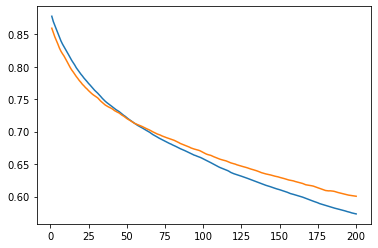

In [11]:
ec = range(1,len(hy.history['accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])